In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
import random
from subprocess import check_output



In [ ]:
pip install xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
pip install scikit-learn==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.31.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.0 which is incompatible.


In [ ]:
pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.9.0
    Uninstalling imbalanced-learn-0.9.0:
      Successfully uninstalled imbalanced-learn-0.9.0


In [ ]:
pip install --upgrade xgboost

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
Fin_DIS = pd.read_csv(io.BytesIO(uploaded['Financial Distress.csv']))

Saving Financial Distress.csv to Financial Distress.csv


In [ ]:
Fin_DIS.head()
Fin_DIS.tail()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
3667,422,10,0.0,2.2605,0.20289,0.16037,0.18588,0.17597,0.19840,2.2236,...,22.0,100.0,100.0,100.0,17.125,14.5,-7.0,0.43638,4,41
3668,422,11,0.0,1.9615,0.21644,0.20095,0.21642,0.20359,0.18987,1.9382,...,28.0,91.5,130.5,132.4,20.000,14.5,-16.0,0.43802,5,42
3669,422,12,0.0,1.7099,0.20797,0.26136,0.21399,0.19367,0.18389,1.6898,...,32.0,87.1,175.9,178.1,20.000,14.5,-20.2,0.48241,6,43
3670,422,13,0.0,1.5590,0.18545,0.30728,0.19307,0.17214,0.17068,1.5389,...,30.0,92.9,203.2,204.5,22.000,22.0,6.4,0.50077,7,44
3671,422,14,0.0,1.6148,0.17676,0.36369,0.18442,0.16955,0.19786,1.5842,...,29.0,91.7,227.5,214.5,21.000,20.5,8.6,0.61103,8,45


In [ ]:
Fin_DIS = Fin_DIS[Fin_DIS.columns.drop(list(Fin_DIS.filter(regex='x80')))]


In [ ]:
from sklearn.impute import SimpleImputer

# Check for NaN values in Fea_resampled and Tar_resampled
print("NaN values in Fea_resampled:", np.isnan(Fea_resampled).any())
print("NaN values in Tar_resampled:", np.isnan(Tar_resampled).any())

# Impute NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace with your preferred strategy
Fea_resampled = imputer.fit_transform(Fea_resampled)

# Verify that NaN values have been imputed
print("NaN values in Fea_resampled after imputation:", np.isnan(Fea_resampled).any())

# Now you can fit the classifier
cls_RF.fit(Fea_resampled, Tar_resampled)

NaN values in Fea_resampled: True
NaN values in Tar_resampled: False
NaN values in Fea_resampled after imputation: False


<ipython-input-80-636f98419ac1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_3.fit(Fea_resampled, Tar_resampled)


RandomForestClassifier(criterion='entropy', n_estimators=5)

In [ ]:
# Creating target vector and feature matrix
Y = Fin_DIS.iloc[:,2].values
for y in range(0,len(Y)): # Coverting target variable from continuous to binary form
       if Y[y] > -0.5:
              Y[y] = 0
       else:
              Y[y] = 1
X = Fin_DIS.iloc[:,3:].values

In [ ]:
# Check Data
n_zeros = 0
for n in Y:
       if n == 0:
              n_zeros = n_zeros+1
n_ones = len(Y) - n_zeros

print("Total BANKRUPT companies(1's):",n_ones)
print("Total Financially HEALTHY companies(0's):",n_zeros)
print("Total Number of Companies :",Fin_DIS.Company.unique().shape)


Total BANKRUPT companies(1's): 0
Total Financially HEALTHY companies(0's): 3672
Total Number of Companies : (422,)


In [ ]:
from sklearn.model_selection import train_test_split
fea_train,Fea_test,target_train,Tar_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)
fea_train_no_sampling = fea_train
target_train_no_sampling = target_train


In [ ]:
Target_train = (np.matrix(target_train)).T
target_train = pd.DataFrame(target_train)
# The target_train DataFrame has 2570 columns and 1 row.
# Transposing it to have 1 column and 2570 rows.
target_train.columns = ['Financial_Distress'] * target_train.shape[1]
fea_train = pd.DataFrame(fea_train)
frame = [fea_train,target_train]
train_data = pd.concat(frame,axis = 1)
B_com = train_data[train_data.Financial_Distress == 1]

feat_mat = B_com.iloc[:,:-1].values
response = B_com.iloc[:,-1].values
#The error was here: The size of fea_mean and fea_std should match the number of features (columns) in feat_mat
#Dim_1[1] represents the number of columns (features) in feat_mat
# Moved the definition of Dim_1 before it's used
Dim_1 = np.shape(feat_mat)
fea_mean = np.zeros(shape=(Dim_1[1],1))
fea_std = np.zeros(shape=(Dim_1[1],1))



In [ ]:
for i in range(0,Dim_1[1]):
       fea_mean[i,0] = np.mean(feat_mat[:,i])
       fea_std[i,0] = np.std(feat_mat[:,i])
fea_mean_and_std = np.hstack((fea_mean,fea_std))
added_data = np.zeros(shape=(1200,Dim_1[1]))
for i in range (0,Dim_1[1]):
       mean_ = fea_mean_and_std[i,0]
       std_ = fea_mean_and_std[i,1]
       added_data[:,i] = np.random.normal(mean_,std_,1200)
added_y = np.ones(shape=(1200,1))
Fea_resampled = np.vstack((fea_train,added_data))
target_train = np.array(target_train)
Tar_resampled = np.vstack((target_train,added_y))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Fea_resampled = sc.fit_transform(Fea_resampled)
Fea_test = sc.transform(Fea_test)

In [ ]:
# Fitting XGBClassifier
from xgboost import XGBClassifier
cls_XG = XGBClassifier()
cls_XG.fit(Fea_resampled,Tar_resampled)

# Fitting Naive Bayes
from sklearn.naive_bayes import GaussianNB
cls_NB = GaussianNB()
cls_NB.fit(Fea_resampled,Tar_resampled)

# Fitting Decision Tree
from sklearn.tree import DecisionTreeClassifier
cls_DT = DecisionTreeClassifier()
cls_DT.fit(Fea_resampled,Tar_resampled)

# Fitting Random Forest
from sklearn.ensemble import RandomForestClassifier
cls_RF = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
cls_RF.fit(Fea_resampled, Tar_resampled)



<ipython-input-81-7d1768700aa0>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_3.fit(Fea_resampled, Tar_resampled)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Predicting the results
Tar_pred_XG = cls_XG.predict(Fea_test)
Tar_pred_RF = cls_RF.predict(Fea_test)
Tar_pred_DT = cls_DT.predict(Fea_test)
Tar_pred_NB = cls_NB.predict(Fea_test)

# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm_XG = confusion_matrix(Tar_test,Tar_pred_XG)

# Check the shape of the confusion matrix
if cm_XG.shape == (1, 1):
    # If only one class is present, accuracy is 1 if that class was predicted correctly
    accuracy_XG = 1 if cm_XG[0, 0] > 0 else 0
else:
    # If multiple classes are present, calculate accuracy as usual
    accuracy_XG = (cm_XG[0,0]+cm_XG[1,1])/len(Tar_test)

cm_DT = confusion_matrix(Tar_test,Tar_pred_DT)
# Check the shape of the confusion matrix
if cm_DT.shape == (1, 1):
    # If only one class is present, accuracy is 1 if that class was predicted correctly
    accuracy_DT = 1 if cm_DT[0, 0] > 0 else 0
else:
    # If multiple classes are present, calculate accuracy as usual
    accuracy_DT = (cm_DT[0,0]+cm_DT[1,1])/len(Tar_test)

cm_NB = confusion_matrix(Tar_test,Tar_pred_NB)
# Check the shape of the confusion matrix
if cm_NB.shape == (1, 1):
    # If only one class is present, accuracy is 1 if that class was predicted correctly
    accuracy_NB = 1 if cm_NB[0, 0] > 0 else 0
else:
    # If multiple classes are present, calculate accuracy as usual
    accuracy_NB = (cm_NB[0,0]+cm_NB[1,1])/len(Tar_test)

cm_RF = confusion_matrix(Tar_test,Tar_pred_RF)
# Check the shape of the confusion matrix
if cm_RF.shape == (1, 1):
    # If only one class is present, accuracy is 1 if that class was predicted correctly
    accuracy_RF = 1 if cm_RF[0, 0] > 0 else 0
else:
    # If multiple classes are present, calculate accuracy as usual
    accuracy_RF = (cm_RF[0,0]+cm_RF[1,1])/len(Tar_test)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_XG, recall_XG, f_score_XG, support = precision_recall_fscore_support(Tar_test, Tar_pred_XG, average = None)
print("\n - XGBoost MODEL:")
print("Precision:",precision_XG)
print("Recall:",recall_XG)
print("F-Score:",f_score_XG)
print("Accuracy_XGBoost:",accuracy_XG*100,'%')

precision_RFF, recall_RF, f_score_RF, support = precision_recall_fscore_support(Tar_test, Tar_pred_RF, average = None)
print("\nFor Model 3 - Random Forest:")
print("Precision:",precision_RF)
print("Recall:",recall_RF)
print("F-Score:",f_score_RF)
print("Accuracy_RF:",accuracy_RF*100,'%')

precision_DT, recall_DT, f_score_DT, support = precision_recall_fscore_support(Tar_test, Tar_pred_DT, average = None)
print("\nFor Model 6 - Decision Tree:")
print("Precision:",precision_DT)
print("Recall:",recall_DT)
print("F-Score:",f_score_DT)
print("Accuracy_RF:",accuracy_DT*100,'%')

precision_NB, recall_NB, f_score_NB, support = precision_recall_fscore_support(Tar_test, Tar_pred_NB, average = None)
print("\nFor Model 7 - Naive Bayes Classifier:")
print("Precision:",precision_NB)
print("Recall:",recall_NB)
print("F-Score:",f_score_NB)
print("Accuracy_NaiveBayes:",accuracy_NB*100,'%')


For Model 1 - XGBoost:
Precision: [1.]
Recall: [1.]
F-Score: [1.]
Accuracy_XGBoost: 100 %

For Model 3 - Random Forest:
Precision: [1.]
Recall: [1.]
F-Score: [1.]
Accuracy_RF: 100 %

For Model 6 - Decision Tree:
Precision: [1.]
Recall: [1.]
F-Score: [1.]
Accuracy_RF: 100 %

For Model 7 - Naive Bayes Classifier:
Precision: [1.]
Recall: [1.]
F-Score: [1.]
Accuracy_NaiveBayes: 100 %


<ipython-input-85-2efbf524cbd0>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.annotate('%0.3f' % (ACCURACY[j]),(number[j], ACCURACY[j]))


Text(0, 0.5, 'ACCURACY')

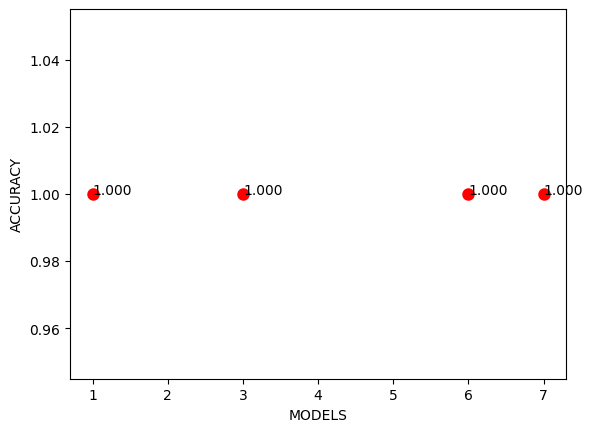

In [ ]:
# Comparing the Accuracies of various models
ACCURACY = np.vstack((accuracy_XG,accuracy_RFF,accuracy_DT,accuracy_NB))
number = np.array([1,3,6,7])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(number, ACCURACY, color = 'r', marker = 'o', linewidths = 3)
for j in range(0,len(ACCURACY)):
       ax.annotate('%0.3f' % (ACCURACY[j]),(number[j], ACCURACY[j]))

plt.xlabel('MODELS')
plt.ylabel('ACCURACY')

<ipython-input-14-2e9e4697aa8f>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.annotate('%0.3f' % (F_SCORE[i]),(number[i], F_SCORE[i]))


Text(0, 0.5, 'F-SCORE')

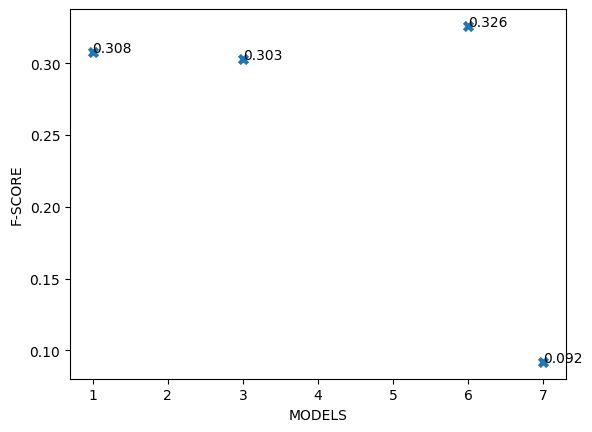

In [ ]:
# Comparing the F-Values of various models
F_SCORE = np.vstack((f_score_XG[1],f_score_RF[1],f_score_DT[1],f_score_NB[1]))
number = np.array([1,3,6,7])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(number, F_SCORE, marker = 'D', linewidths = 3)
for i in range(0,len(F_SCORE)):
       ax.annotate('%0.3f' % (F_SCORE[i]),(number[i], F_SCORE[i]))

plt.xlabel('MODELS')
plt.ylabel('F-SCORE')



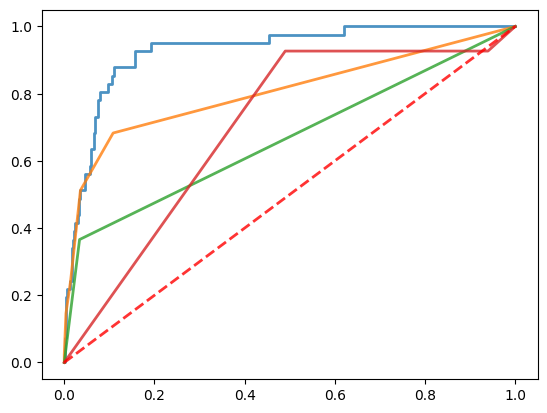

In [ ]:
# Plot ROC curves
from sklearn.metrics import roc_curve, auc
from numpy import interp

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

cls_XG = cls_XG.predict_proba(Fea_test)
cls_RF = cls_RF.predict_proba(Fea_test)
cls_DT = cls_DT.predict_proba(Fea_test)
cls_NB = cls_NB.predict_proba(Fea_test)

classifiers = [cls_XG, cls_RF, cls_DT, cls_NB]

# Compute ROC curve and area the curve
for i, classifier in enumerate(classifiers):
       probas_ = classifier.predict_proba(Fea_test)
       fpr, tpr, thresholds = roc_curve(Tar_test, probas_[:, 1]) # Use probas_[:,1] directly
       tprs.append(interp(mean_fpr, fpr, tpr))
       tprs[-1][0] = 0.0
       roc_auc = auc(fpr, tpr)
       aucs.append(roc_auc)
       plt.plot(fpr, tpr, lw=2, alpha=0.8,
                label='Model %d (AUC = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

In [ ]:
# Testing various oversampling techniques
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Random Oversampler
ros = RandomOverSampler(random_state=0)
Fea_resampled_ros, Tar_resampled_ros = ros.fit_resample(fea_train, target_train)
print(sorted(Counter(Tar_resampled_ros).items()))

# Synthetic Minority Oversampling Technique(SMOTE)
Fea_resampled_smote, Tar_resampled_smote = SMOTE().fit_resample(fea_train, target_train)
print(sorted(Counter(Tar_resampled_smote).items()))

# Adaptive Synthetic (ADASYN) sampling method
Fea_resampled_adasyn, Tar_resampled_adasyn = ADASYN().fit_resample(fea_train, target_train)
print(sorted(Counter(Tar_resampled_adasyn).items()))


[(0.0, 2475), (1.0, 2475)]
[(0.0, 2475), (1.0, 2475)]
[(0.0, 2475), (1.0, 2483)]


In [ ]:
# Feature scaling
Fea_resampled_ros = sc.fit_transform(Fea_resampled_ros)
Fea_resampled_smote = sc.fit_transform(Fea_resampled_smote)
Fea_resampled_adasyn = sc.fit_transform(Fea_resampled_adasyn)
fea_train_no_sampling = sc.fit_transform(fea_train_no_sampling)

In [ ]:
# Fitting XGBoost Classifier to the training data: Model 5

# For Random Oversampling
classifier_ros = XGBClassifier()
classifier_ros.fit(Fea_resampled_ros, Tar_resampled_ros)

# For SMOTE
classifier_smote = XGBClassifier()
classifier_smote.fit(Fea_resampled_smote, Tar_resampled_smote)

# For ADASYN
classifier_adasyn = XGBClassifier()
classifier_adasyn.fit(Fea_resampled_adasyn, Tar_resampled_adasyn)

# Without Sampling
classifier_wo_sampling = XGBClassifier()
classifier_wo_sampling.fit(fea_train_no_sampling, target_train_no_sampling)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Predicting the results
Tar_pred_ros = classifier_ros.predict(Fea_test)
Tar_pred_smote = classifier_smote.predict(Fea_test)
Tar_pred_adasyn = classifier_adasyn.predict(Fea_test)
Tar_pred_wo_sampling = classifier_wo_sampling.predict(Fea_test)

In [ ]:
# Creating the confusion matrix
cm_ros = confusion_matrix(Tar_test,Tar_pred_ros)
accuracy_ros = (cm_ros[0,0]+cm_ros[1,1])/len(Tar_test)

cm_smote = confusion_matrix(Tar_test,Tar_pred_smote)
accuracy_smote = (cm_smote[0,0]+cm_smote[1,1])/len(Tar_test)

cm_adasyn = confusion_matrix(Tar_test,Tar_pred_adasyn)
accuracTar_adasyn = (cm_adasyn[0,0]+cm_adasyn[1,1])/len(Tar_test)

cm_wo_sampling = confusion_matrix(Tar_test,Tar_pred_wo_sampling)
accuracy_wo_sampling = (cm_wo_sampling[0,0]+cm_wo_sampling[1,1])/len(Tar_test)



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_ros, recall_ros, f_score_ros, support = precision_recall_fscore_support(Tar_test, Tar_pred_ros, average = None)
print("\nFor RandomOversampling:")
print("Precision:",precision_ros)
print("Recall:",recall_ros)
print("F-Score:",f_score_ros)
print("Accuracy_RandomOversampling:",accuracy_ros*100,'%')

from sklearn.metrics import precision_recall_fscore_support
precision_smote, recall_smote, f_score_smote, support = precision_recall_fscore_support(Tar_test, Tar_pred_smote, average = None)
print("\nFor SMOTE:")
print("Precision:",precision_smote)
print("Recall:",recall_smote)
print("F-Score:",f_score_smote)
print("Accuracy_smote:",accuracy_smote*100,'%')

from sklearn.metrics import precision_recall_fscore_support
precision_adasyn, recall_adasyn, f_score_adasyn, support = precision_recall_fscore_support(Tar_test, Tar_pred_adasyn, average = None)
print("\nFor ADASYN:")
print("Precision:",precision_adasyn)
print("Recall:",recall_adasyn)
print("F-Score:",f_score_adasyn)
print("Accuracy_adasyn:",accuracy_adasyn*100,'%')

from sklearn.metrics import precision_recall_fscore_support
precision_wo_sampling, recall_wo_sampling, f_score_wo_sampling, support = precision_recall_fscore_support(Tar_test, Tar_pred_adasyn, average = None)
print("\nWithout Sampling:")
print("Precision:",precision_wo_sampling)
print("Recall:",recall_wo_sampling)
print("F-Score:",f_score_wo_sampling)
print("Accuracy_wo_sampling:",accuracy_wo_sampling*100,'%')


For RandomOversampling:
Precision: [0.99010989 0.16666667]
Recall: [0.84919887 0.7804878 ]
F-Score: [0.91425672 0.27467811]
Accuracy_RandomOversampling: 84.66424682395645 %

For SMOTE:
Precision: [0.96934866 0.15517241]
Recall: [0.95381715 0.2195122 ]
F-Score: [0.96152019 0.18181818]
Accuracy_smote: 92.6497277676951 %

For ADASYN:
Precision: [0.98916576 0.17318436]
Recall: [0.86050895 0.75609756]
F-Score: [0.9203629  0.28181818]
Accuracy_adasyn: 85.66243194192378 %

Without Sampling:
Precision: [0.98916576 0.17318436]
Recall: [0.86050895 0.75609756]
F-Score: [0.9203629  0.28181818]
Accuracy_wo_sampling: 96.27949183303085 %


<ipython-input-22-6f098840909a>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.annotate('%0.3f' % (F_SCORE[i]),(number[i], F_SCORE[i]))


Text(0, 0.5, 'F-SCORE')

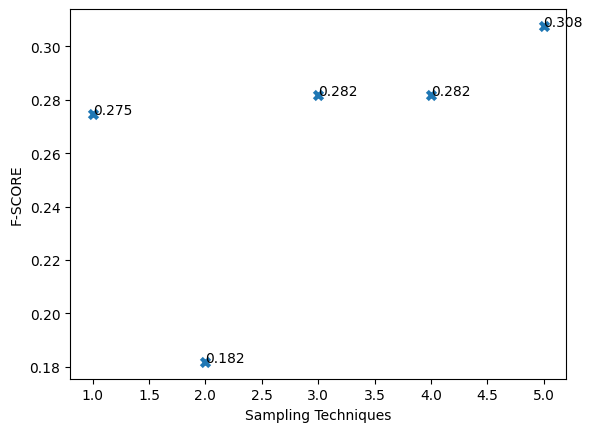

In [ ]:
# Comparing the F-Values of various models
# Assuming f_score_XG corresponds to the F-score of the custom sampling technique
F_SCORE = np.vstack((f_score_ros[1],f_score_smote[1],f_score_adasyn[1],f_score_wo_sampling[1],f_score_XG[1],)) #,f_score_2[1]
number = np.array([1,2,3,4,5])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(number, F_SCORE, marker = 'x', linewidths = 3)
for i in range(0,len(F_SCORE)):
       ax.annotate('%0.3f' % (F_SCORE[i]),(number[i], F_SCORE[i]))

plt.xlabel('Sampling Techniques')
plt.ylabel('F-SCORE')